<a href="https://colab.research.google.com/github/PGBeermann/DisenoExperimental/blob/main/FenolesAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO PARA LA DEGRADACION DE FENOLES EN MEDIO LIQUIDO

In [1]:
import numpy as np
from numpy import diff
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import odeint

DEFINICIÓN DE LAS FUNCIONES DEL MODELO

In [64]:
def f(C,t,ka,kd,k3,k4,k5,k6,k7):
    A=C[0]     #Concentración de fenol en el filtrado
    B=C[1]     #Concentración de fenol en la biomasa
    
    #MODELO CINÉTICO
    
    Bm=k6-k5*np.exp(-k7*(t-14.97)**2)        #función que simula el comportamiento de Bm(t)
    
    kk=k3*np.exp(-k4*(t-7.5)**2)             #función que simula el cambio de velocidad de degradación de fenoles
    
    dBdt=ka*A*(1-B/Bm)-kd*B/Bm-kk*B
    dAdt=-ka*A*(1-B/Bm)+kd*B/Bm
         
    return np.array([dAdt,dBdt])



    #CÁLCULO DEL RESIDUAL
def residual(XR):
    X1=tuple(XR)
    
    y=odeint(f,C0,texp,args=X1)
    
    sum=np.sum((y[:,0]-filt)**2)+np.sum((y[:,1]-bio)**2)
    
  
    return sum


In [18]:
texp0=np.array([4,4,4,8,8,8,14,14,14,21,21,21,29,29,29])
texp1=np.array([0,0,0,4,4,4,8,8,8,14,14,14,21,21,21,29,29,29])
filt0=np.array([1920,1680,1888,1744,1552,1680,1600,1520,1552,1640,1440,1540,1240,1400,1320,1285,1300,1175])
bio0=np.array([853.3466, 814.0853, 848.4916,806.66,836.66,859.99,769.99,769.99,773.33,413.33,420,356.66,683.33,729.99,663.33,779.99,783.33,729.99])

filt0=filt0/1000
bio0=bio0/1000
tot0m=filt0+bio0

In [19]:
texp=np.array([0,4,8,14,21,29])
filt=np.array([1829,1658.66,1557.33,1540.0,1320.0,1253.33])
bio=np.array([839,834.44,771.10,396.66,692.22,764.44])


filt=filt/1000
bio=bio/1000
total=filt+bio

In [65]:
C0=np.array([1.829,0.839])

X0=np.array([0.1,0.1,0.1,0.1,0.1,1.303,0.0483])
bnds=((0,100.0),(0,100),(0,100.0),(0,100),(0,100),(0,100),(0,100))
res = minimize(residual, X0, method='TNC', bounds=bnds, tol=1e-6,options={'maxiter':500,'disp':False})
XX0=res.x
print(XX0)  
X1=tuple(XX0)
res=residual(X1)
print("Residual:",res)

[0.4396472  0.33581303 0.08793823 0.02514136 0.68073704 1.25880794
 0.05409665]
Residual: 0.00915518790496757


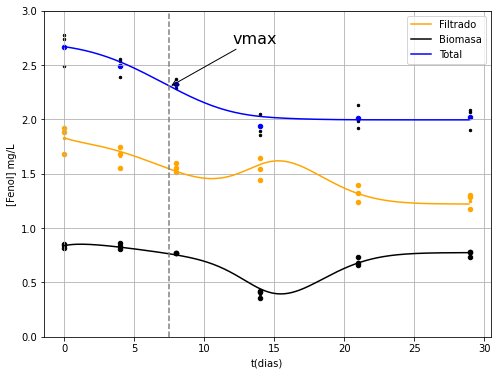

In [66]:
tcalc=np.arange(0,29,0.1)  
y=odeint(f,C0,tcalc,args=X1)
ytotal=y[:,0]+y[:,1]    
total=filt+bio
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(texp,filt,s=6,c='orange')
plt.scatter(texp,bio,s=6,c='black')
plt.scatter(texp,total,s=6,c='black')

plt.plot(tcalc,y[:,0],color="orange",label='Filtrado')
plt.plot(tcalc,y[:,1],color="black",label='Biomasa')
plt.plot(tcalc,ytotal,color="blue",label='Total')
plt.xlabel("t(dias)")
plt.ylabel("[Fenol] mg/L")
ax.set_ylim([0,3.0])

#Datos experimentales incluyendo filt(t=0) exp y bio(t=0) extrapolado
texp1=np.array([0,0,0,4,4,4,8,8,8,14,14,14,21,21,21,29,29,29])
filt0=np.array([1920,1680,1888,1744,1552,1680,1600,1520,1552,1640,1440,1540,1240,1400,1320,1285,1300,1175])
bio0=np.array([853.3466, 814.0853, 848.4916,806.66,836.66,859.99,769.99,769.99,773.33,413.33,420,356.66,683.33,729.99,663.33,779.99,783.33,729.99])

filt0=filt0/1000
bio0=bio0/1000
tot0=filt0+bio0
plt.scatter(texp1,filt0,s=20,c='orange')
plt.scatter(texp1,bio0,s=20,c='black')
plt.scatter(texp1,tot0,s=6,c='black')

#Datos Promedio
texp=np.array([0,4,8,14,21,29])
filt=np.array([1829,1658.66,1557.33,1540.0,1320.0,1253.33])/1000
bio=np.array([839,834.44,771.10,396.66,692.22,764.44])/1000
tot=filt+bio
plt.scatter(texp,tot,s=20.0,c='blue')

plt.axvline(x=7.5,color="grey", linestyle="--")
plt.annotate("vmax", xy=(7.5, 2.3), xytext=(12, 2.7),arrowprops=dict(arrowstyle="->"),fontsize=16)

plt.grid(True)
plt.legend()
plt.show()

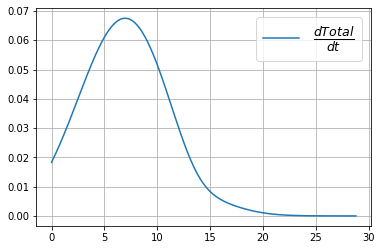

In [67]:
dx=0.1
dy = diff(ytotal)/dx
plt.plot(tcalc[0:-1],-dy,label=r'$\frac{dTotal}{dt}$')
plt.grid(True)
plt.legend(fontsize=18)
plt.show()